<a href="https://colab.research.google.com/github/Suriya6744/Project/blob/main/Stock_Price_Forecasting_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##หุ้น PTT

In [2]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [3]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [4]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [5]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [6]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

#แทนที่ M ด้วยช่องว่าง
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



<ipython-input-6-73a5efd69154>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)
<ipython-input-6-73a5efd69154>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
<ipython-input-6-73a5efd69154>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##หุ้น SCG

In [7]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [8]:
scg.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,6.15,6.10,6.15,6.05,183.00K,0.00%
1,5/1/2022,6.25,6.10,6.35,6.05,1.15M,1.63%
2,6/1/2022,6.10,6.25,6.25,6.10,133.50K,-2.40%
3,7/1/2022,6.10,6.05,6.15,6.05,205.10K,0.00%
4,10/1/2022,6.15,6.05,6.15,6.00,144.40K,0.82%


In [9]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [10]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [11]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

<ipython-input-11-e59ed9faea6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
<ipython-input-11-e59ed9faea6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scg['ปริมาณ']=scg['ปริมาณ'].astype(int)


,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##หุ้น SOLAR

In [12]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [13]:
solar.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,1.51,1.52,1.54,1.49,9.13M,0.67%
1,5/1/2022,1.51,1.51,1.52,1.46,4.25M,0.00%
2,6/1/2022,1.44,1.51,1.51,1.44,9.95M,-4.64%
3,7/1/2022,1.24,1.37,1.37,1.23,93.48M,-13.89%
4,10/1/2022,1.24,1.25,1.27,1.22,21.28M,0.00%


In [14]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [15]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ         object
% เปลี่ยน      object
dtype: object

In [16]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


## ราคาน้ำมันดิบ (WTI)

In [17]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [18]:
wti.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,2/1/2022,76.03,75.83,76.12,75.83,NaN,0.53%
1,3/1/2022,76.17,76.05,76.65,74.50,NaN,0.18%
2,4/1/2022,77.25,76.19,77.84,75.92,NaN,1.42%
3,5/1/2022,77.39,77.23,78.76,76.72,NaN,0.18%
4,6/1/2022,79.69,77.38,80.43,76.92,NaN,2.97%


In [19]:
wti.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [20]:
wti.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [21]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##ราคาทองคำ (XAU)

In [22]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [23]:
xau.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,"1,800.85","1,830.14","1,832.06","1,797.93",NaN,-1.51%
1,4/1/2022,"1,814.56","1,801.34","1,816.83","1,798.44",NaN,0.76%
2,5/1/2022,"1,809.53","1,814.90","1,829.82","1,807.97",NaN,-0.28%
3,6/1/2022,"1,788.68","1,809.94","1,811.89","1,786.03",NaN,-1.15%
4,7/1/2022,"1,795.63","1,789.55","1,799.20","1,782.63",NaN,0.39%


In [24]:
xau.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [25]:
xau.dtypes

วันเดือนปี     object
ล่าสุด         object
ราคาเปิด       object
สูงสุด         object
ต่ำสุด         object
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [26]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

,date,cp_xau
0,3/1/2022,1800.85
1,4/1/2022,1814.56
2,5/1/2022,1809.53
3,6/1/2022,1788.68
4,7/1/2022,1795.63
...,...,...
255,26/12/2022,1797.61
256,27/12/2022,1813.93
257,28/12/2022,1804.09
258,29/12/2022,1814.89


##อัตราแลกเปลี่ยน (EX)

In [27]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
ex.shape

(260, 7)

In [28]:
ex.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [29]:
ex.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [30]:
ex.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [31]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ex=ex[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ex =ex.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex

,date,cp_ex
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##Merge Table

In [32]:
tm1 = wti.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5.head()

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,1800.85,NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,1814.56,38.0,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,1809.53,39.0,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,1788.68,38.0,71680000.0,6.10,133500.0,1.44,9950000.0


In [33]:
tm5.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [34]:
#ลบค่า NaN
all_data= tm5.dropna()

# แทนที่เครื่องหมาย / ด้วย - ในคอลัมน์ date
all_data['date'] = all_data['date'].str.replace('/', '-')

# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data

<ipython-input-34-9071ba2101b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')
<ipython-input-34-9071ba2101b6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
<ipython-input-34-9071ba2101b6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [35]:
# save data
#all_data.to_csv('Project_data.csv', index=False)

## Standardize

In [36]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,2568.5625,33.25,60334.1200,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,2568.5741,33.19,60058.3007,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,2673.5995,33.55,60010.2140,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,2658.3334,33.62,60369.0806,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,2645.8940,33.62,60563.4042,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...
305,2811.9714,34.69,62359.0909,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,2762.4640,34.60,62761.9780,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,2736.1426,34.78,62746.2502,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,2723.5554,34.62,62831.4918,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit และ Transform ข้อมูล
scaled_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# แสดงผลลัพธ์
scaled_df

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.797703,-1.100940,-1.703451,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.797676,-1.137859,-1.881685,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.547293,-0.916344,-1.912759,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.583688,-0.873271,-1.680860,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.613344,-0.873271,-1.555289,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.335439,-0.270256,-0.134575,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.398189,-0.159498,-0.144739,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.428197,-0.257950,-0.089656,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


In [38]:
#หาความสัมพันธ์
correlation_matrix = scaled_df.corr()
correlation_matrix

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.051631,0.633348,0.154632,0.025324,-0.267331,-0.020053,0.258085,0.211177
cp_ex,0.051631,1.000000,0.061141,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.633348,0.061141,1.000000,-0.134076,0.008375,-0.512522,-0.112726,0.018376,0.135715
cp_ptt,0.154632,-0.585569,-0.134076,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.025324,-0.116166,0.008375,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.267331,-0.622965,-0.512522,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,-0.020053,-0.136218,-0.112726,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.258085,-0.354033,0.018376,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.211177,-0.144074,0.135715,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


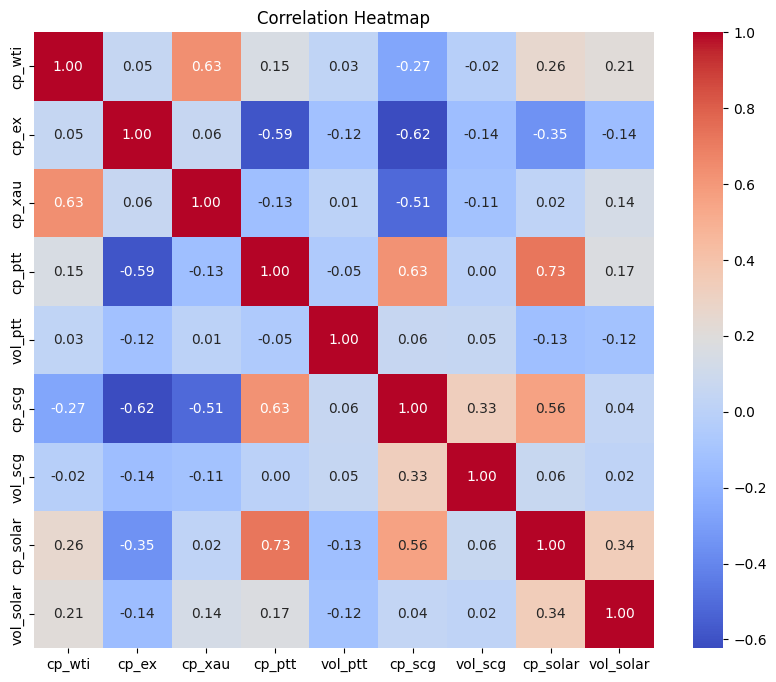

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

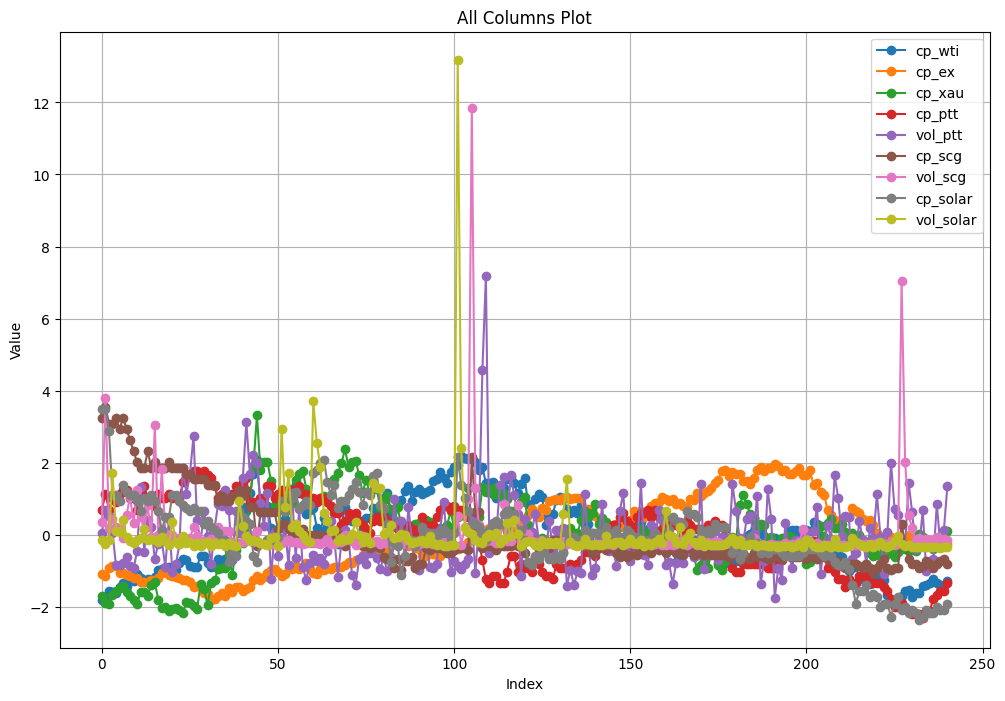

In [40]:
plt.figure(figsize=(12, 8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#XGBoost Model

##Close Price PTT

In [ ]:
s_ppt = scaled_df[['cp_wti',	'cp_ex','cp_xau','vol_ptt','cp_ptt']]
s_ppt

,cp_wti,cp_ex,cp_xau,vol_ptt,cp_ptt
0,-1.797703,-1.100940,-1.703451,0.060415,0.700069
1,-1.797676,-1.137859,-1.881685,0.690430,1.131294
2,-1.547293,-0.916344,-1.912759,0.509425,0.700069
3,-1.583688,-0.873271,-1.680860,0.062627,1.023487
4,-1.613344,-0.873271,-1.555289,-0.850508,0.915681
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.670978,-1.779472
237,-1.335439,-0.270256,-0.134575,0.845262,-1.671666
238,-1.398189,-0.159498,-0.144739,-0.296434,-1.563860
239,-1.428197,-0.257950,-0.089656,0.128614,-1.563860


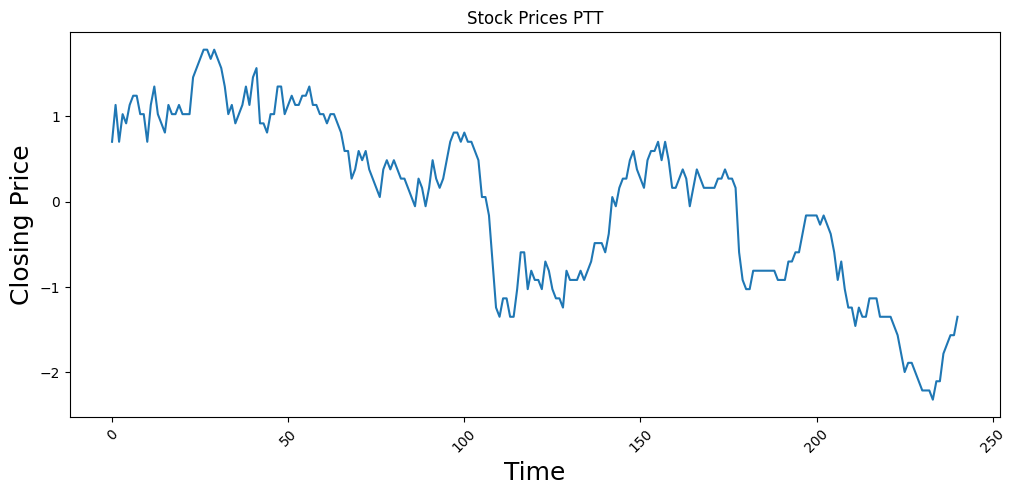

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(s_ppt)), s_ppt['cp_ptt'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.title('Stock Prices PTT')
plt.show()

###หาค่าพารามิเตอร์ที่เหมาะสม

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = s_ppt[['cp_wti',	'cp_ex','cp_xau','vol_ptt']]  # Replace with your independent variables
y = s_ppt['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 100
Best max_depth: 7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# กำหนดตัวแปรตามและตัวแปรอิสระ
X = s_ppt[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = s_ppt['cp_ptt']

# ทำการทดลองด้วยค่า random_state ต่าง ๆ
best_random_state = None
best_rmse = float('inf')  # เริ่มต้นด้วยค่า RMSE ที่สูงมาก

for random_state in range(100):  # ทดลองกับค่า random_state ตั้งแต่ 0 ถึง 99
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # หาค่า random_state ที่ให้ค่า RMSE ต่ำสุด
    if rmse < best_rmse:
        best_rmse = rmse
        best_random_state = random_state

print("Best random_state:", best_random_state)
print("Best RMSE:", best_rmse)

Best random_state: 31
Best RMSE: 0.5914146197875125


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = s_ppt[['cp_wti',	'cp_ex','cp_xau','vol_ptt']]  # Replace with your independent variables
y = s_ppt['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=100,  # You can adjust other parameters here
        max_depth=7,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.24058070597983586
Learning Rate: 0.1, Mean Squared Error: 0.08833500041983164
Learning Rate: 0.2, Mean Squared Error: 0.08269100722459448
Learning Rate: 0.3, Mean Squared Error: 0.07176478071811757
Learning Rate: 0.4, Mean Squared Error: 0.09906252850701669


###ประเมินประสิทธิภาพ

In [ ]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.3,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.2678894934821401
Mean Absolute Percentage Error (MAPE): 51.54105458509686


###เปรียบเทียบค่าจริงและค่าพยากรณ์


In [ ]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
20,1.039510,1.023487
180,-0.295217,-1.024829
240,-1.634675,-1.348248
8,1.067007,1.023487
186,-0.485117,-0.809217


In [ ]:
# mean_predicted = comparison_df['Predicted'].mean()
# std_dev_predicted = comparison_df['Predicted'].std()

# mean_actual = comparison_df['Actual'].mean()
# std_dev_actual = comparison_df['Actual'].std()

# def inverse_standardization(standardized_value, mean, std_dev):
#     original_value = (standardized_value * std_dev) + mean
#     return original_value

# comparison_df['Predicted'] = comparison_df['Predicted'].apply(lambda x: inverse_standardization(x, mean_predicted, std_dev_predicted))
# comparison_df['Actual'] = comparison_df['Actual'].apply(lambda x: inverse_standardization(x, mean_actual, std_dev_actual))
# comparison_df


###กราฟ

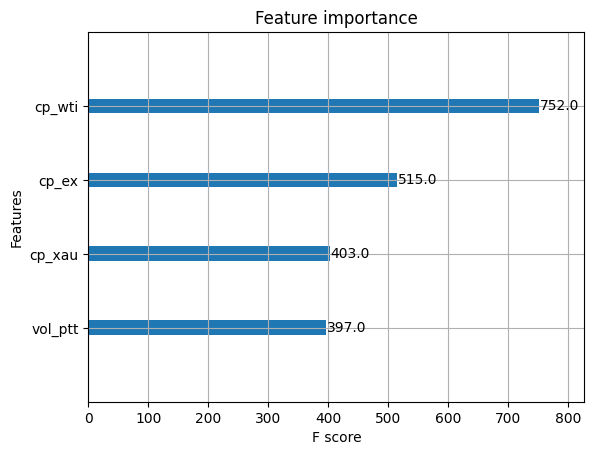

In [ ]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

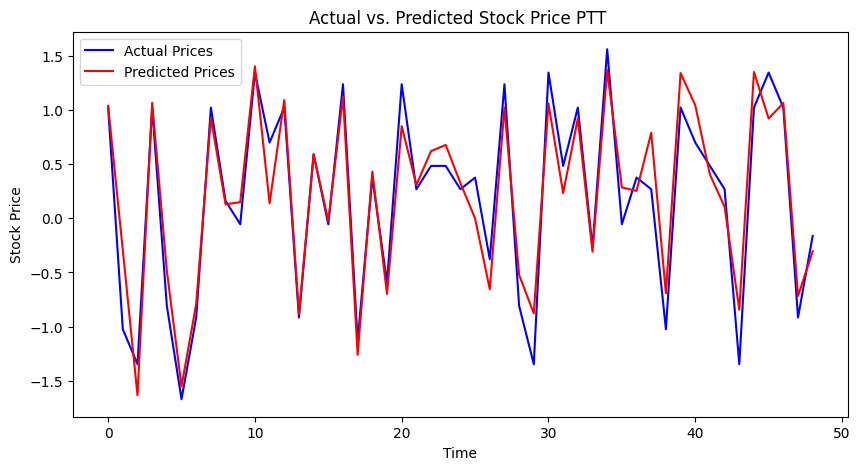

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Price PTT ')
plt.show()

###เลือกเฉพาะตัวแปรอิสระที่มีความสำคัญ

In [ ]:
scaled_df

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.797703,-1.100940,-1.703451,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.797676,-1.137859,-1.881685,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.547293,-0.916344,-1.912759,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.583688,-0.873271,-1.680860,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.613344,-0.873271,-1.555289,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.335439,-0.270256,-0.134575,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.398189,-0.159498,-0.144739,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.428197,-0.257950,-0.089656,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


In [ ]:
d_ptt =scaled_df[['cp_wti','vol_solar','cp_ptt']]
d_ptt

,cp_wti,vol_solar,cp_ptt
0,-1.797703,-0.157981,0.700069
1,-1.797676,-0.265913,1.131294
2,-1.547293,-0.139845,0.700069
3,-1.583688,1.707604,1.023487
4,-1.613344,0.110743,0.915681
...,...,...,...
236,-1.217412,-0.336467,-1.779472
237,-1.335439,-0.327620,-1.671666
238,-1.398189,-0.353457,-1.563860
239,-1.428197,-0.336688,-1.563860


####หาค่าพารามิเตอร์ที่เหมาะสม

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = d_ptt[['cp_wti']]  # Replace with your independent variables
y = d_ptt['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 50
Best max_depth: 3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# กำหนดตัวแปรตามและตัวแปรอิสระ
X = d_ptt[['cp_wti']]
y = d_ptt['cp_ptt']

# ทำการทดลองด้วยค่า random_state ต่าง ๆ
best_random_state = None
best_rmse = float('inf')  # เริ่มต้นด้วยค่า RMSE ที่สูงมาก

for random_state in range(100):  # ทดลองกับค่า random_state ตั้งแต่ 0 ถึง 99
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # หาค่า random_state ที่ให้ค่า RMSE ต่ำสุด
    if rmse < best_rmse:
        best_rmse = rmse
        best_random_state = random_state

print("Best random_state:", best_random_state)
print("Best RMSE:", best_rmse)

Best random_state: 75
Best RMSE: 0.8307629914848826


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = d_ptt[['cp_wti']]  # Replace with your independent variables
y = d_ptt['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=50,  # You can adjust other parameters here
        max_depth=3,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.8880376102159471
Learning Rate: 0.1, Mean Squared Error: 1.063465891966701
Learning Rate: 0.2, Mean Squared Error: 1.159363951359477
Learning Rate: 0.3, Mean Squared Error: 1.2817878882818807
Learning Rate: 0.4, Mean Squared Error: 1.3750398582097145


####ประเมินประสิทธิภาพ

In [ ]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,
    max_depth=3,
    learning_rate=0.1,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 1.03124482639512
Mean Absolute Percentage Error (MAPE): 170.53045557038948


####เปรียบเทียบค่าจริงและค่าพยากรณ์


In [ ]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
85,-0.450072,0.053232
143,0.051719,-0.054574
46,-0.009280,1.023487
2,-1.240465,0.700069
203,0.179044,-0.270186


####กราฟ

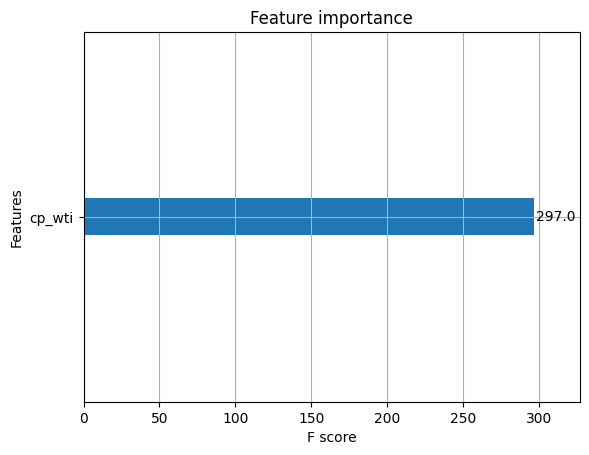

In [ ]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

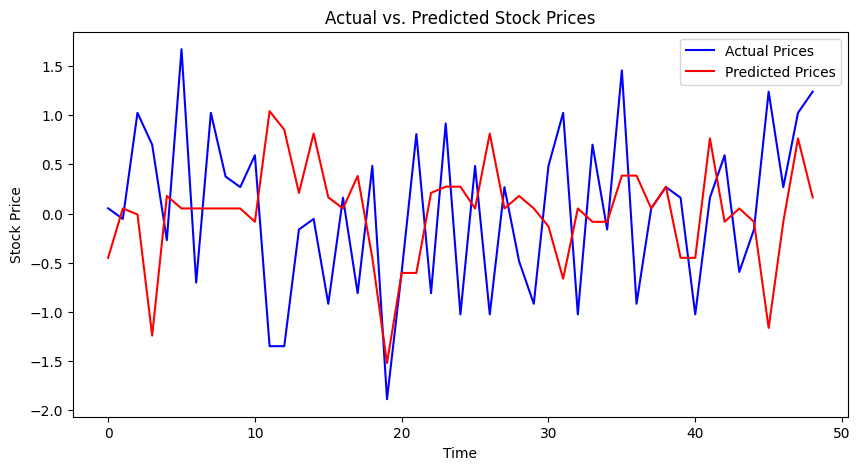

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

##Close Price SCG

In [ ]:
s_scg = scaled_df[['cp_wti',	'cp_ex','cp_xau','vol_scg','cp_scg']]
s_scg


,cp_wti,cp_ex,cp_xau,vol_scg,cp_scg
0,-1.797703,-1.100940,-1.703451,0.362923,3.242433
1,-1.797676,-1.137859,-1.881685,3.807543,3.551029
2,-1.547293,-0.916344,-1.912759,0.186596,3.088135
3,-1.583688,-0.873271,-1.680860,0.441647,3.088135
4,-1.613344,-0.873271,-1.555289,0.225423,3.242433
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.157154,-0.923611
237,-1.335439,-0.270256,-0.134575,-0.066318,-0.800172
238,-1.398189,-0.159498,-0.144739,-0.141124,-0.738453
239,-1.428197,-0.257950,-0.089656,-0.118326,-0.676734


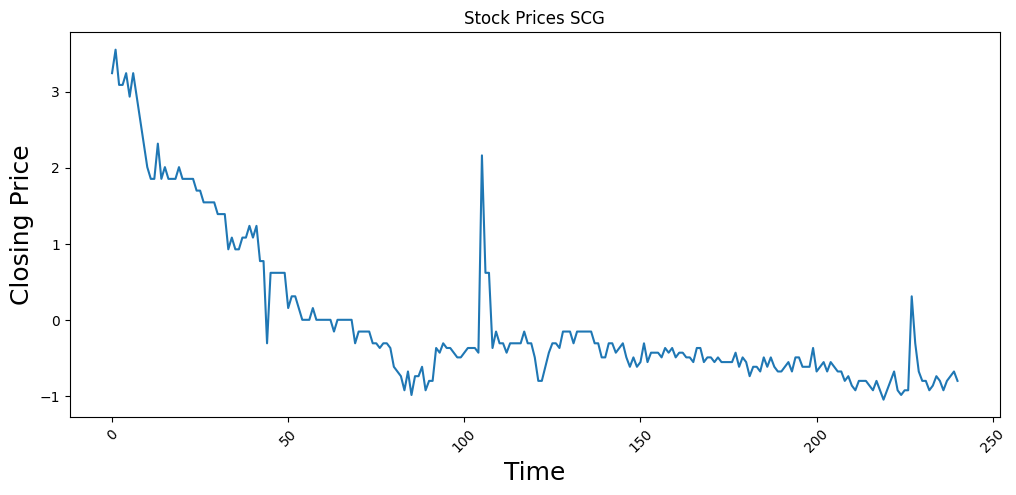

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(s_scg)), s_scg['cp_scg'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.title('Stock Prices SCG')
plt.show()

###หาค่าพารามิเตอร์ที่เหมาะสม

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = s_scg[['cp_wti',	'cp_ex','cp_xau','vol_scg']]  # Replace with your independent variables
y = s_scg['cp_scg']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 50
Best max_depth: 5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# กำหนดตัวแปรตามและตัวแปรอิสระ
X = s_scg[['cp_wti', 'cp_ex', 'cp_xau', 'vol_scg']]
y = s_scg['cp_scg']

# ทำการทดลองด้วยค่า random_state ต่าง ๆ
best_random_state = None
best_rmse = float('inf')  # เริ่มต้นด้วยค่า RMSE ที่สูงมาก

for random_state in range(100):  # ทดลองกับค่า random_state ตั้งแต่ 0 ถึง 99
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # หาค่า random_state ที่ให้ค่า RMSE ต่ำสุด
    if rmse < best_rmse:
        best_rmse = rmse
        best_random_state = random_state

print("Best random_state:", best_random_state)
print("Best RMSE:", best_rmse)

Best random_state: 94
Best RMSE: 0.42533674986709324


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = s_scg[['cp_wti',	'cp_ex','cp_xau','vol_scg']]  # Replace with your independent variables
y = s_scg['cp_scg']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=94)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=50,  # You can adjust other parameters here
        max_depth=5,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.3949221266953354
Learning Rate: 0.1, Mean Squared Error: 0.052344760375081664
Learning Rate: 0.2, Mean Squared Error: 0.05255661275118999
Learning Rate: 0.3, Mean Squared Error: 0.053132536234082706
Learning Rate: 0.4, Mean Squared Error: 0.047374948005161455


###ประเมินประสิทธิภาพ

In [ ]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,
    max_depth=5,
    learning_rate=0.4,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.21765786915515242
Mean Absolute Percentage Error (MAPE): 114.65846334608459


###เปรียบเทียบค่าจริงและค่าพยากรณ์


In [ ]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
55,0.067582,0.002177
168,-0.338216,-0.553296
39,0.870814,1.236560
23,1.952136,1.853752
156,-0.357873,-0.491577


###กราฟ

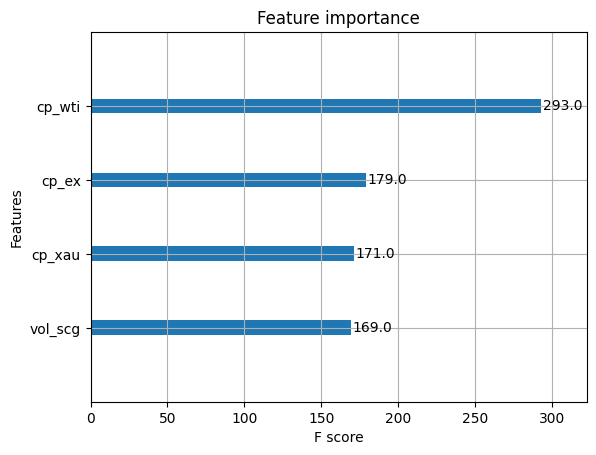

In [ ]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

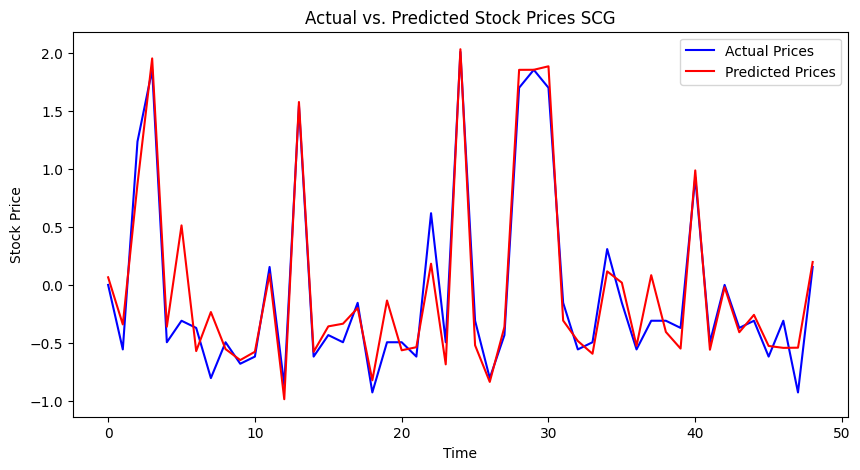

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices SCG')
plt.show()

##Close Price SOLAR

In [ ]:
s_solar = scaled_df[['cp_wti',	'cp_ex','cp_xau','vol_solar','cp_solar']]
s_solar

,cp_wti,cp_ex,cp_xau,vol_solar,cp_solar
0,-1.797703,-1.100940,-1.703451,-0.157981,3.496903
1,-1.797676,-1.137859,-1.881685,-0.265913,3.496903
2,-1.547293,-0.916344,-1.912759,-0.139845,2.876057
3,-1.583688,-0.873271,-1.680860,1.707604,1.102213
4,-1.613344,-0.873271,-1.555289,0.110743,1.102213
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.336467,-2.179400
237,-1.335439,-0.270256,-0.134575,-0.327620,-2.002015
238,-1.398189,-0.159498,-0.144739,-0.353457,-2.090708
239,-1.428197,-0.257950,-0.089656,-0.336688,-2.090708


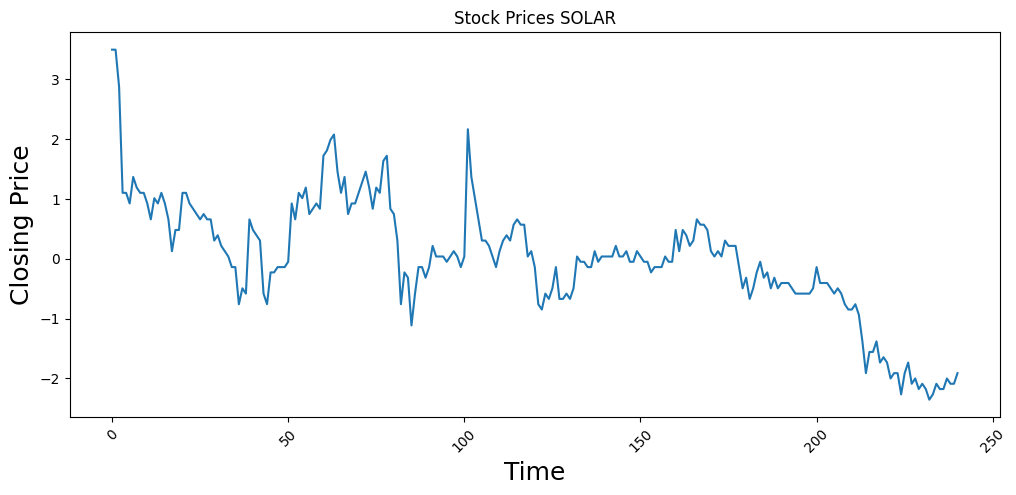

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(s_solar )), s_solar ['cp_solar'])
# plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.title('Stock Prices SOLAR')
plt.show()

###หาค่าพารามิเตอร์ที่เหมาะสม

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = s_solar [['cp_wti',	'cp_ex','cp_xau','vol_solar']]  # Replace with your independent variables
y = s_solar ['cp_solar']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 100
Best max_depth: 7


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# กำหนดตัวแปรตามและตัวแปรอิสระ
X = s_solar[['cp_wti', 'cp_ex', 'cp_xau', 'vol_solar']]
y = s_solar['cp_solar']

# ทำการทดลองด้วยค่า random_state ต่าง ๆ
best_random_state = None
best_rmse = float('inf')  # เริ่มต้นด้วยค่า RMSE ที่สูงมาก

for random_state in range(100):  # ทดลองกับค่า random_state ตั้งแต่ 0 ถึง 99
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # หาค่า random_state ที่ให้ค่า RMSE ต่ำสุด
    if rmse < best_rmse:
        best_rmse = rmse
        best_random_state = random_state

print("Best random_state:", best_random_state)
print("Best RMSE:", best_rmse)

Best random_state: 6
Best RMSE: 0.624849187989191


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = s_solar [['cp_wti',	'cp_ex','cp_xau','vol_solar']]  # Replace with your independent variables
y = s_solar ['cp_solar']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=100,  # You can adjust other parameters here
        max_depth=7,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.16839340639038458
Learning Rate: 0.1, Mean Squared Error: 0.14174458623842953
Learning Rate: 0.2, Mean Squared Error: 0.14172614559179514
Learning Rate: 0.3, Mean Squared Error: 0.1398949980782085
Learning Rate: 0.4, Mean Squared Error: 0.1514277816997912


###ประเมินประสิทธิภาพ

In [ ]:
import numpy as np
# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.3,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(y_test)
mape = (1/n) * np.sum(np.abs((y_test - y_pred) / y_test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)

Root Mean Squared Error (RMSE): 0.37402539763792575
Mean Absolute Percentage Error (MAPE): 155.58362781180816


###เปรียบเทียบค่าจริงและค่าพยากรณ์


In [ ]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()

,Predicted,Actual
160,0.224470,0.481367
17,1.033690,0.126598
38,-0.237823,-0.582940
220,-1.707303,-1.735939
206,-0.490055,-0.494248


###กราฟ

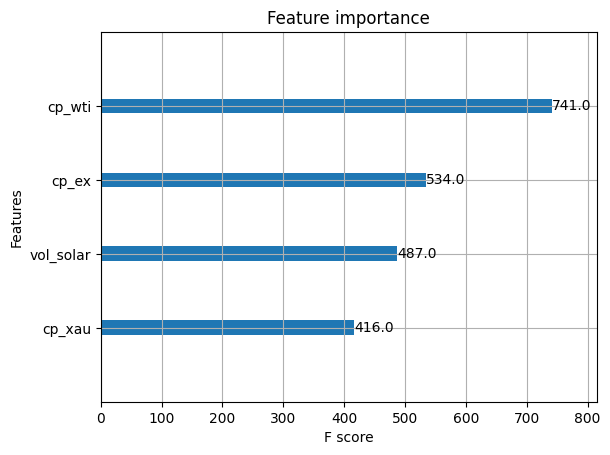

In [ ]:
# Feature importance analysis (optional)
plot_importance(model)
plt.show()

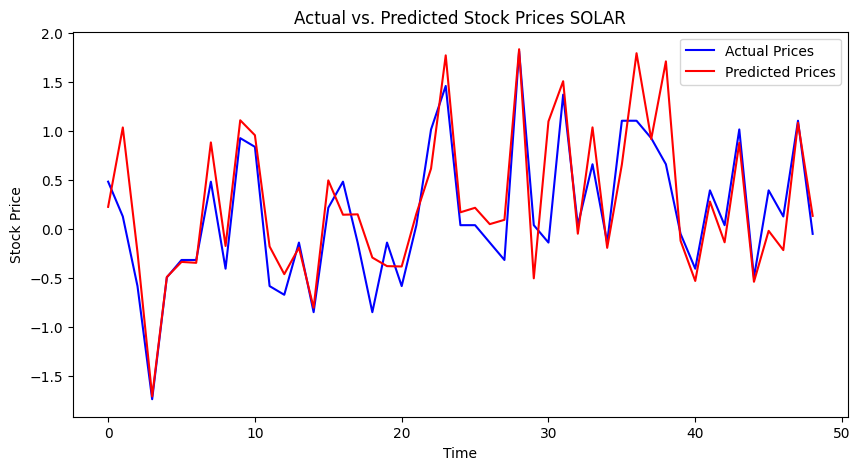

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices SOLAR')
plt.show()

#LSTM Model


##Close Price PTT

###หาค่าพารามิเตอร์ที่เหมาะสม

In [ ]:
pip list

In [ ]:
pip install --upgrade tensorflow

In [ ]:
s_ppt

,cp_wti,cp_ex,cp_xau,vol_ptt,cp_ptt
0,-1.797703,-1.100940,-1.703451,0.060415,0.700069
1,-1.797676,-1.137859,-1.881685,0.690430,1.131294
2,-1.547293,-0.916344,-1.912759,0.509425,0.700069
3,-1.583688,-0.873271,-1.680860,0.062627,1.023487
4,-1.613344,-0.873271,-1.555289,-0.850508,0.915681
...,...,...,...,...,...
236,-1.217412,-0.214877,-0.394920,-0.670978,-1.779472
237,-1.335439,-0.270256,-0.134575,0.845262,-1.671666
238,-1.398189,-0.159498,-0.144739,-0.296434,-1.563860
239,-1.428197,-0.257950,-0.089656,0.128614,-1.563860


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# กำหนดตัวแปรตามและตัวแปรอิสระ
X = s_ppt[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = s_ppt['cp_ptt']

# ทำการทดลองด้วยค่า random_state ต่าง ๆ
best_random_state = None
best_rmse = float('inf')  # เริ่มต้นด้วยค่า RMSE ที่สูงมาก

for random_state in range(100):  # ทดลองกับค่า random_state ตั้งแต่ 0 ถึง 99
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # หาค่า random_state ที่ให้ค่า RMSE ต่ำสุด
    if rmse < best_rmse:
        best_rmse = rmse
        best_random_state = random_state

print("Best random_state:", best_random_state)
print("Best RMSE:", best_rmse)

Best random_state: 31
Best RMSE: 0.5914146197875125


In [ ]:
# LSTM โดยมักจะ reshape ข้อมูลจากรูปแบบ (samples, features) เป็น (samples, time_steps, features)
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = s_ppt[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = s_ppt['cp_ptt']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

# Normalize the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sequence_length = 1
X_train = X_train.reshape((X_train.shape[0], sequence_length, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], sequence_length, X_test.shape[1]))

best_score = float('inf')
best_params = None

# Iterate over possible values of unit, parameter, epochs, and batch_size
for unit in [50, 100, 150, 200]:
    for parameter in [10, 20, 50, 100]:
        for epochs in [50, 100, 200]:
            for batch_size in [16, 32, 64]:
                # Build the model
                model = Sequential()
                model.add(LSTM(unit, input_shape=(X_train.shape[1], X_train.shape[2])))
                model.add(Dense(parameter))
                model.compile(loss='mean_squared_error', optimizer='adam')

                # Train the model
                model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

                # Evaluate the model on the test data
                score = model.evaluate(X_test, y_test)

                # Check if this combination of parameters gives a better score
                if score < best_score:
                    best_score = score
                    best_params = (unit, parameter, epochs, batch_size)

# Print the best combination of parameters
print("Best unit, parameter, epochs, and batch_size values:", best_params)

2/2 [==============================] - 1s 9ms/step - loss: 0.2908


2/2 [==============================] - 0s 9ms/step - loss: 0.3172


2/2 [==============================] - 0s 8ms/step - loss: 0.2878
Best unit, parameter, epochs, and batch_size values: (200, 50, 200, 16)


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# แบ่งข้อมูลเป็นชุด train และ test
train_size = int(len(s_ppt) * 0.8)
train_data, test_data = s_ppt.iloc[:train_size, :], s_ppt.iloc[train_size:, :]

# เลือกตัวแปรต้นและตัวแปรตาม
X_train, y_train = train_data[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']].values, train_data['cp_ptt'].values
X_test, y_test = test_data[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']].values, test_data['cp_ptt'].values

# ปรับขนาดข้อมูล
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# สร้างโมเดล LSTM โดยใช้ Keras
model = Sequential()
model.add(LSTM(200, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(100))
model.compile(loss='mean_squared_error', optimizer='adam')

# ฝึกโมเดล
model.fit(X_train, y_train, epochs=200, batch_size=16)

# ทดสอบโมเดล
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Epoch 1/200
12/12 [==============================] - 1s 15ms/step - loss: 0.7480
Epoch 2/200
12/12 [==============================] - 0s 19ms/step - loss: 0.6973
Epoch 3/200
12/12 [==============================] - 0s 9ms/step - loss: 0.6387
Epoch 4/200
12/12 [==============================] - 0s 8ms/step - loss: 0.6270
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 0.5681
Epoch 6/200
12/12 [==============================] - 0s 8ms/step - loss: 0.5144
Epoch 7/200
12/12 [==============================] - 0s 8ms/step - loss: 0.4394
Epoch 8/200
12/12 [==============================] - 0s 8ms/step - loss: 0.3557
Epoch 9/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2966
Epoch 10/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2565
Epoch 11/200
12/12 [==============================] - 0s 9ms/step - loss: 0.2237
Epoch 12/200
12/12 [==============================] - 0s 8ms/step - loss: 0.1901
Epoch 13/200
12/12 [===============

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# แบ่งข้อมูลเป็นชุด train และ test
train_size = int(len(s_ppt) * 0.8)
train_data, test_data = s_ppt.iloc[:train_size, :], s_ppt.iloc[train_size:, :]

# เลือกตัวแปรต้นและตัวแปรตาม
X_train, y_train = train_data[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']].values, train_data['cp_ptt'].values
X_test, y_test = test_data[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']].values, test_data['cp_ptt'].values

# ปรับขนาดข้อมูล
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_lstm_model(neurons=50, input_shape=(3, 1)):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=input_shape, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# กำหนดพารามิเตอร์ที่เราต้องการค้นหา
param_grid = {
    'neurons': [50, 100, 150],
    'batch_size': [32, 64, 128],
    'epochs': [50, 100, 200]
}

# สร้าง LSTM model ด้วย KerasClassifier
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=create_lstm_model, input_shape=(X_train.shape[1], 1))

# ใช้ GridSearchCV ในการค้นหาพารามิเตอร์ที่เหมาะสม
tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
grid_result = grid_search.fit(X_train, y_train)

# แสดงผลลัพธ์ที่ดีที่สุด
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ModuleNotFoundError: ignored

##Close Price SCG

##Close Price SOLAR

#ARIMA-GARCH

##Close Price PTT

###ARIMA

####ทดสอบ ADF

In [ ]:
a = scaled_df[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']]
a

,cp_ptt,cp_wti,cp_ex,cp_xau,vol_ptt
0,0.700069,-1.797703,-1.100940,-1.703451,0.060415
1,1.131294,-1.797676,-1.137859,-1.881685,0.690430
2,0.700069,-1.547293,-0.916344,-1.912759,0.509425
3,1.023487,-1.583688,-0.873271,-1.680860,0.062627
4,0.915681,-1.613344,-0.873271,-1.555289,-0.850508
...,...,...,...,...,...
236,-1.779472,-1.217412,-0.214877,-0.394920,-0.670978
237,-1.671666,-1.335439,-0.270256,-0.134575,0.845262
238,-1.563860,-1.398189,-0.159498,-0.144739,-0.296434
239,-1.563860,-1.428197,-0.257950,-0.089656,0.128614


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# ทำ ADF Test
adf_result = adfuller(a['cp_ptt'])

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#ค่า ADF Statistic มากกว่า Critical Values = ไม่นิ่ง

ADF Statistic: -1.25314373391258
p-value: 0.6503274228098506
Critical Values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}


In [ ]:
# ลบค่าก่อนหน้าเพื่อทำให้ข้อมูล stationary
#ใชการแปลงอนุกรมเวลาให้มีค่าเฉลี่ยคงที่โดยหาผลต่างครั้งที่ d=1
a['cp_ptt_diff'] = a['cp_ptt'].diff()
a.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย

# ทำ ADF Test อีกครั้ง
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(a['cp_ptt_diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#เนื่องจากค่า ADF Statistic น้อยกว่า Critical Values แสดงว่าข้อมูลนิ่งแล้ว

ADF Statistic: -15.175035290317654
p-value: 6.312317313857727e-28
Critical Values: {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}


<ipython-input-88-f387dc347ded>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['cp_ptt_diff'] = a['cp_ptt'].diff()
<ipython-input-88-f387dc347ded>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย


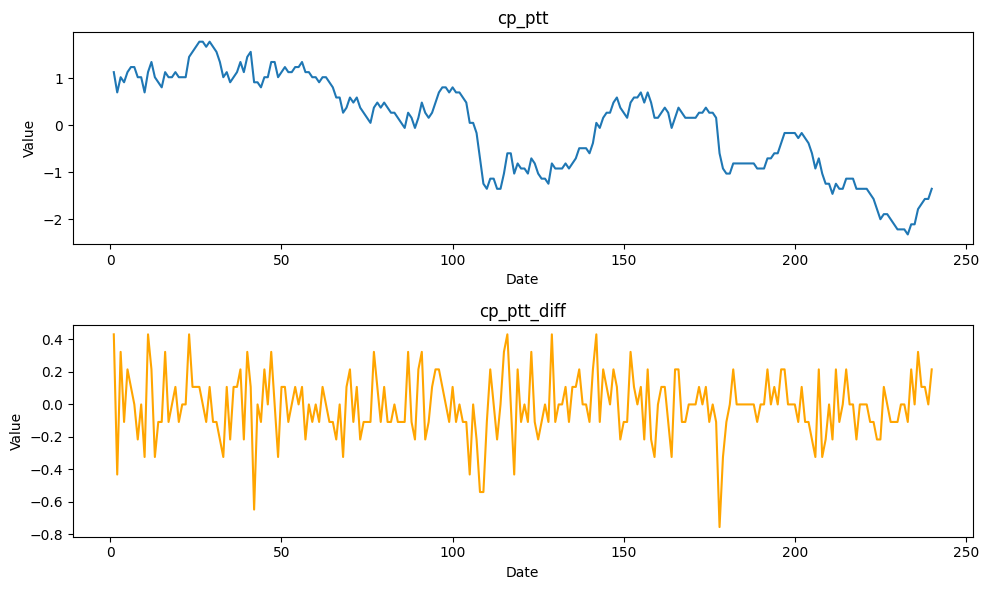

In [ ]:
import matplotlib.pyplot as plt

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(a.index, a['cp_ptt'], label='cp_ptt')
axes[0].set_title('cp_ptt')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')

# วาดกราฟของ 'cp_ptt_diff' ใน subplot ที่สอง
axes[1].plot(a.index, a['cp_ptt_diff'], label='cp_ptt_diff', color='orange')
axes[1].set_title('cp_ptt_diff')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')

# ปรับแต่งรูปร่างและตำแหน่งของ subplot
plt.tight_layout()

# แสดง subplot
plt.show()

####ACF และ PACF

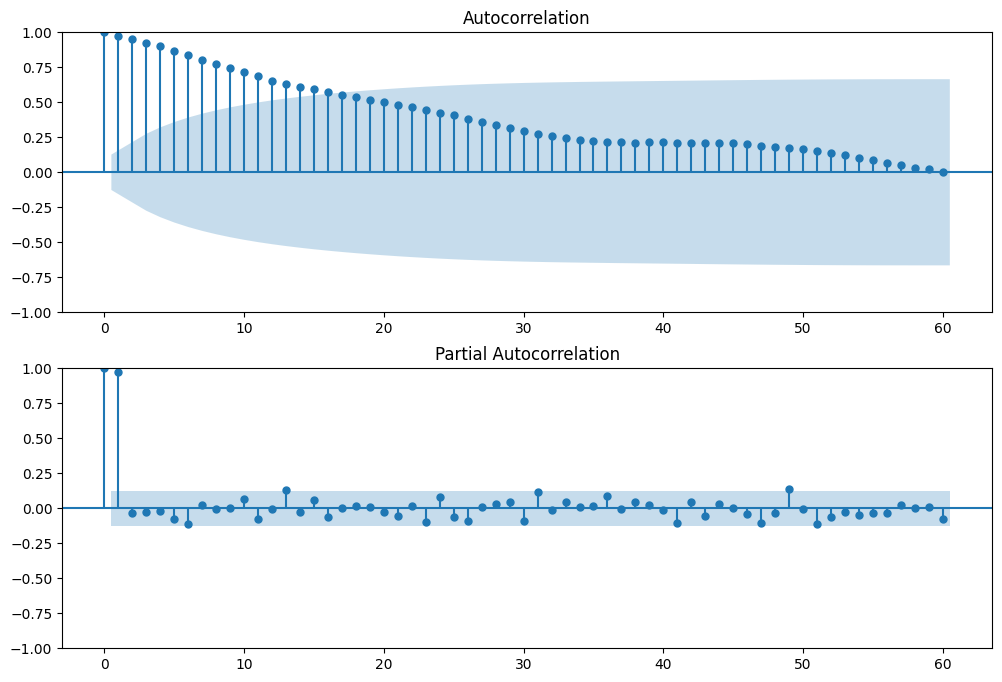

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ทำนายรายละเอียดของพารามิเตอร์ p และ q จาก ACF และ PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(a['cp_ptt'], lags=60, ax=ax1)
sm.graphics.tsa.plot_pacf(a['cp_ptt'], lags=60, ax=ax2)
plt.show()

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

data = a['cp_ptt_diff']

# สร้างเซตของค่า p, d, และ q
p_values = range(1, 3)  # เลือกค่า p จาก 1 ถึง 2
d_values = [1]  # ค่า d ต้องเป็น 1 สำหรับ ARIMA
q_values = range(1, 16)  # เลือกค่า q จาก 1 ถึง 15

# สร้างรายการค่า AIC และพารามิเตอร์ที่เกี่ยวข้อง
aic_values = []
params = []

# วนลูปผสานค่า p, d, และ q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # สร้างแบบจำลอง ARIMA
        model = sm.tsa.ARIMA(data, order=(p, d, q))

        # ปรับโมเดล
        results = model.fit()

        # นับค่า AIC และเก็บค่า AIC และพารามิเตอร์
        aic = results.aic
        aic_values.append(aic)
        params.append((p, d, q))

        print(f'ARIMA({p},{d},{q}) - AIC: {aic}')

    except Exception as e:
        continue

# หาค่า AIC ที่ดีที่สุดและพารามิเตอร์ที่เกี่ยวข้อง
best_aic = min(aic_values)
best_params = params[aic_values.index(best_aic)]

print(f'Best AIC: {best_aic}')
print(f'Best Model (p, d, q): {best_params}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,1) - AIC: -101.34937785243491


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,2) - AIC: -99.67279529713093


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,3) - AIC: -97.72147010120442


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,4) - AIC: -95.72581793758023


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,5) - AIC: -93.78063793861581


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(1,1,6) - AIC: -93.88367096618407
ARIMA(1,1,7) - AIC: -91.86539698574211


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(1,1,8) - AIC: -90.52528366314948
ARIMA(1,1,9) - AIC: -88.52786187873792


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(1,1,10) - AIC: -86.4912100368289


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(1,1,11) - AIC: -86.69372039663193


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,12) - AIC: -92.48011046155804


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,13) - AIC: -99.3095472087902


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,14) - AIC: -97.43749704223666


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,15) - AIC: -96.91446208263358
ARIMA(2,1,1) - AIC: -99.35394053902851


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,2) - AIC: -97.72217633342326


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(2,1,3) - AIC: -101.27804171792734


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,4) - AIC: -104.86430068204314


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,5) - AIC: -98.38659299293242


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,6) - AIC: -96.92657617980275
ARIMA(2,1,7) - AIC: -95.89270131428438


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(2,1,8) - AIC: -98.81801228384285


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,9) - AIC: -96.64386080785246


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,10) - AIC: -93.69977068022743


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(2,1,11) - AIC: -99.35466680748783


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,12) - AIC: -99.73503303967223


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,13) - AIC: -98.0624851408653


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,14) - AIC: -97.39119633685112
ARIMA(2,1,15) - AIC: -95.1475036487237
Best AIC: -104.86430068204314
Best Model (p, d, q): (2, 1, 4)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


####ประเมินประสิทธิภาพ

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# แบ่งข้อมูลเป็นชุดการฝึกสอนและชุดทดสอบ
data = a['cp_ptt_diff']
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# สร้างโมเดล ARIMA(2,1,4)
order = (2, 1, 4)
model = ARIMA(train, order=order)
model_fit = model.fit()

# ทำนายค่า cp_ptt ในชุดทดสอบ
arima_pedict= model_fit.forecast(steps=len(test))

# คำนวณค่า RMSE และ MAPE
mse = mean_squared_error(test, arima_pedict)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(test)
mape = (1/n) * np.sum(np.abs((test - arima_pedict) / test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Root Mean Squared Error (RMSE): 0.15152804973876857
Mean Absolute Percentage Error (MAPE): inf


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


####กราฟ ARIMA(2,1,4)

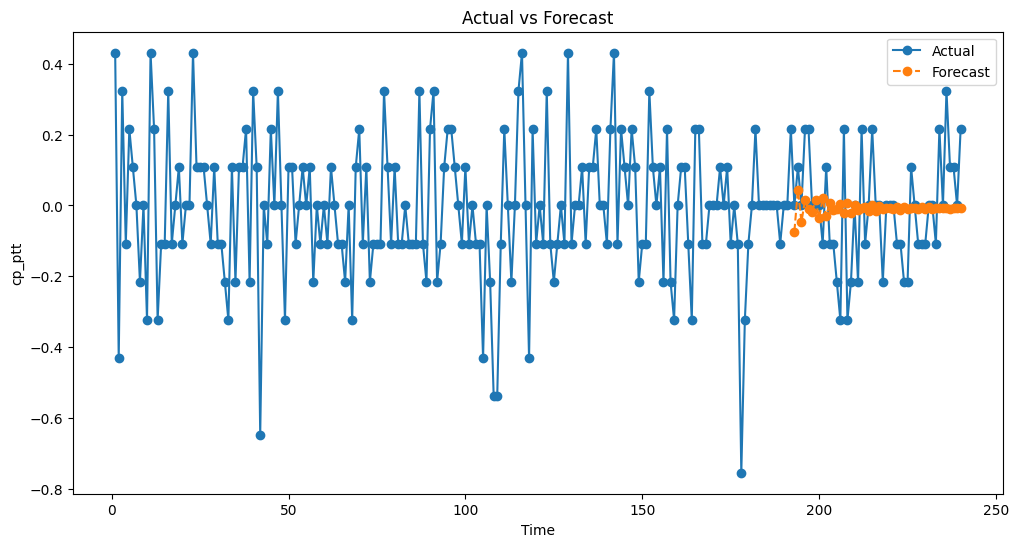

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual', marker='o', linestyle='-')
plt.plot(test.index, arima_pedict, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()


###GARCH

In [ ]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 916.4/916.4 kB 15.3 MB/s eta 0:00:00


In [ ]:
import arch
import pandas as pd
import numpy as np

# แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
train_size = int(len(a) * 0.8)
train_data = a.iloc[:train_size]
test_data = a.iloc[train_size:]

# สร้างและฟิตโมเดล GARCH(2,4) ด้วยข้อมูลการฝึกอบรม
garch_order = (2, 4)
model_garch = arch.arch_model(train_data['cp_ptt_diff'], x=train_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']],
                             vol='Garch', p=garch_order[0], q=garch_order[1])
results_garch = model_garch.fit()

# ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
predictions = results_garch.forecast(start=0, horizon=len(test_data))
forecasted_residuals = predictions.mean.values

# แสดงชุดการทดสอบที่มีการพยากรณ์
# คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
test_data['forecasted_cp_ptt_diff'] = test_data['cp_ptt_diff'].iloc[-1] + np.cumsum(forecasted_residuals)

# แสดงชุดการทดสอบที่มีการพยากรณ์
test_data = pd.DataFrame(test_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt', 'cp_ptt_diff', 'forecasted_cp_ptt_diff']])
test_data.head()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9395811880.32666
Iteration:      2,   Func. Count:     22,   Neg. LLF: 129149934.86751804
Iteration:      3,   Func. Count:     33,   Neg. LLF: 585.4104338088504
Iteration:      4,   Func. Count:     44,   Neg. LLF: -37.92538888005843
Iteration:      5,   Func. Count:     54,   Neg. LLF: -38.21261765942615
Iteration:      6,   Func. Count:     64,   Neg. LLF: -38.31499788951015
Iteration:      7,   Func. Count:     73,   Neg. LLF: -38.46792103874352
Iteration:      8,   Func. Count:     82,   Neg. LLF: -38.51330893372088
Iteration:      9,   Func. Count:     91,   Neg. LLF: -38.52168137998588
Iteration:     10,   Func. Count:    100,   Neg. LLF: -38.52479464857763
Iteration:     11,   Func. Count:    109,   Neg. LLF: -38.52503832723022
Iteration:     12,   Func. Count:    118,   Neg. LLF: -38.52514465461574
Iteration:     13,   Func. Count:    127,   Neg. LLF: -38.52515117618756
Iteration:     14,   Func. Count:    135,   Neg. LLF: 

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03984. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
<ipython-input-95-19e64a2b179f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,cp_wti,cp_ex,cp_xau,vol_ptt,cp_ptt_diff,forecasted_cp_ptt_diff
193,-0.130115,1.778764,-0.086023,-1.245696,0.000000,0.210417
194,-0.163772,1.797223,-0.155460,0.337636,0.107806,0.205222
195,0.101814,1.698772,-0.033934,-0.599829,0.000000,0.200027
196,0.134828,1.692619,-0.082541,-0.926081,0.215612,0.194831
197,0.138399,1.760304,-0.483053,-0.152293,0.215612,0.189636


In [ ]:
# from sklearn.metrics import mean_squared_error

# # คำนวณค่า MSE
# mse = mean_squared_error(test_data['cp_ptt_diff'], test_data['forecasted_cp_ptt_diff'], squared=True)
# print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
# คำนวณค่า RMSE
mse = mean_squared_error(test_data['cp_ptt_diff'], test_data['forecasted_cp_ptt_diff'], squared=True)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# คำนวณค่า MAPE
mape = np.mean(np.abs((test_data['cp_ptt_diff'] - test_data['forecasted_cp_ptt_diff']) / test_data['cp_ptt_diff'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 0.2007890339909544
Mean Absolute Percentage Error (MAPE): inf%


###กราฟ ARIMA(2,1,4) - GARCH(2,4)

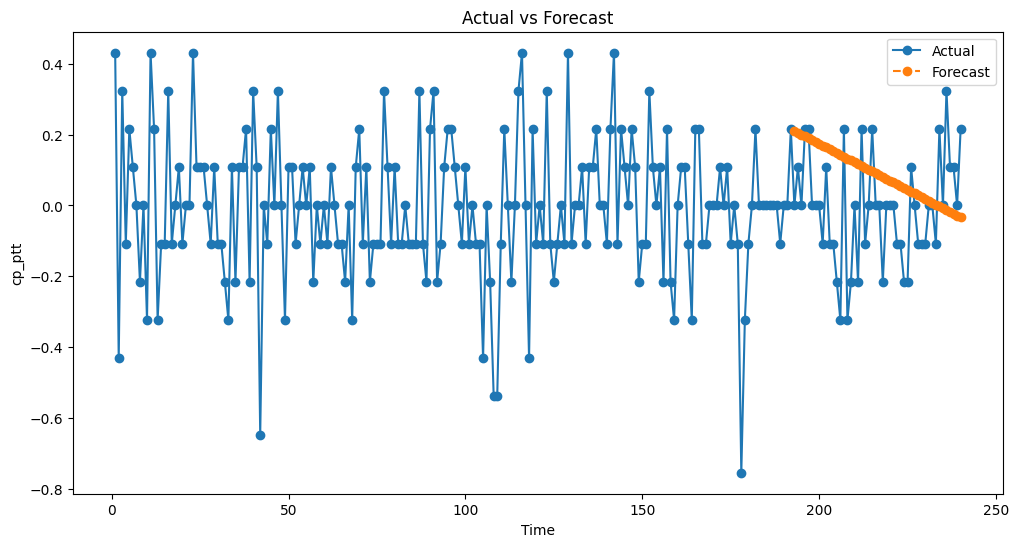

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(a['cp_ptt_diff'], label='Actual', marker='o', linestyle='-')
plt.plot(test_data.index, test_data['forecasted_cp_ptt_diff'], label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()

##Close Price SCG

###ARIMA

####ทดสอบ ADF

In [ ]:
b = scaled_df[['cp_scg','cp_wti','cp_ex','cp_xau','vol_scg']]
b

,cp_scg,cp_wti,cp_ex,cp_xau,vol_scg
0,3.242433,-1.797703,-1.100940,-1.703451,0.362923
1,3.551029,-1.797676,-1.137859,-1.881685,3.807543
2,3.088135,-1.547293,-0.916344,-1.912759,0.186596
3,3.088135,-1.583688,-0.873271,-1.680860,0.441647
4,3.242433,-1.613344,-0.873271,-1.555289,0.225423
...,...,...,...,...,...
236,-0.923611,-1.217412,-0.214877,-0.394920,-0.157154
237,-0.800172,-1.335439,-0.270256,-0.134575,-0.066318
238,-0.738453,-1.398189,-0.159498,-0.144739,-0.141124
239,-0.676734,-1.428197,-0.257950,-0.089656,-0.118326


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# ทำ ADF Test
adf_result = adfuller(b['cp_scg'])

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#ค่า ADF Statistic น้อยกว่า Critical Values = นิ่ง

ADF Statistic: -3.9334947650779393
p-value: 0.0018017154336713607
Critical Values: {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}


####ACF และ PACF

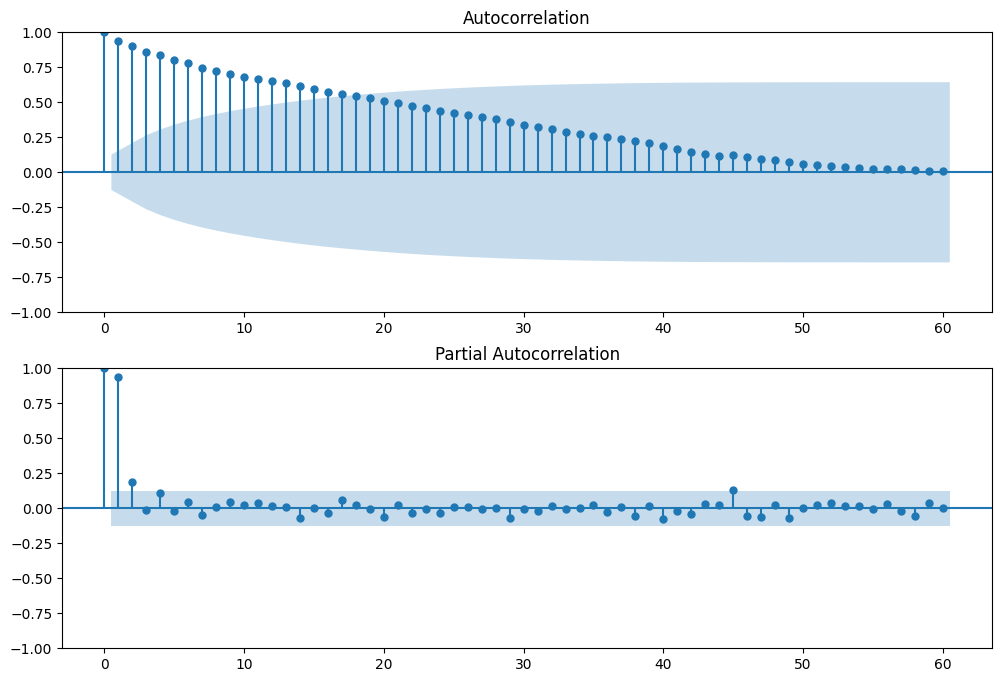

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ทำนายรายละเอียดของพารามิเตอร์ p และ q จาก ACF และ PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(b['cp_scg'], lags=60, ax=ax1)
sm.graphics.tsa.plot_pacf(b['cp_scg'], lags=60, ax=ax2)
plt.show()

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

data = b['cp_scg']

# สร้างเซตของค่า p, d, และ q
p_values = range(1, 4)  # เลือกค่า p จาก 1 ถึง 3
d_values = [1]  # ค่า d ต้องเป็น 1 สำหรับ ARIMA
q_values = range(1, 17)  # เลือกค่า q จาก 1 ถึง 16

# สร้างรายการค่า AIC และพารามิเตอร์ที่เกี่ยวข้อง
aic_values = []
params = []

# วนลูปผสานค่า p, d, และ q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # สร้างแบบจำลอง ARIMA
        model = sm.tsa.ARIMA(data, order=(p, d, q))

        # ปรับโมเดล
        results = model.fit()

        # นับค่า AIC และเก็บค่า AIC และพารามิเตอร์
        aic = results.aic
        aic_values.append(aic)
        params.append((p, d, q))

        print(f'ARIMA({p},{d},{q}) - AIC: {aic}')

    except Exception as e:
        continue

# หาค่า AIC ที่ดีที่สุดและพารามิเตอร์ที่เกี่ยวข้อง
best_aic = min(aic_values)
best_params = params[aic_values.index(best_aic)]

print(f'Best AIC: {best_aic}')
print(f'Best Model (p, d, q): {best_params}')

ARIMA(1,1,1) - AIC: 40.937620772053094
ARIMA(1,1,2) - AIC: 40.195433894209806
ARIMA(1,1,3) - AIC: 36.087466066991496
ARIMA(1,1,4) - AIC: 37.74539062087625
ARIMA(1,1,5) - AIC: 39.74371293570884
ARIMA(1,1,6) - AIC: 38.65329250878149
ARIMA(1,1,7) - AIC: 40.63237677767693
ARIMA(1,1,8) - AIC: 41.782060539082444
ARIMA(1,1,9) - AIC: 43.39302572230555
ARIMA(1,1,10) - AIC: 44.962669669895426
ARIMA(1,1,11) - AIC: 46.8994074209553
ARIMA(1,1,12) - AIC: 48.8083098642105


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1,1,13) - AIC: 49.3695130295214
ARIMA(1,1,14) - AIC: 50.54864930944378
ARIMA(1,1,15) - AIC: 51.64334321484808
ARIMA(1,1,16) - AIC: 52.186379317162164
ARIMA(2,1,1) - AIC: 39.029245159814124


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,2) - AIC: 36.87239222927752
ARIMA(2,1,3) - AIC: 37.99597478375707
ARIMA(2,1,4) - AIC: 39.74463767930778
ARIMA(2,1,5) - AIC: 35.03646815109603


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(2,1,6) - AIC: 40.44285458220678


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,7) - AIC: 38.45973865890264


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,8) - AIC: 40.436907446540985


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,9) - AIC: 42.075088525189955


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,10) - AIC: 44.39908904828132


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,11) - AIC: 48.8962607526763
ARIMA(2,1,12) - AIC: 50.77204167233148


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,13) - AIC: 49.6964333754139


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,14) - AIC: 52.64112535819086


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,15) - AIC: 50.60863213411149


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,16) - AIC: 51.73628124288258
ARIMA(3,1,1) - AIC: 35.22729333474858
ARIMA(3,1,2) - AIC: 37.186902644807
ARIMA(3,1,3) - AIC: 34.52894256612792


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,4) - AIC: 41.10648313953272


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3,1,5) - AIC: 36.72025310631835


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,6) - AIC: 39.010697619481604


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,7) - AIC: 42.26292569352672


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,8) - AIC: 42.95724821730954


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,9) - AIC: 44.30343972113984


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,10) - AIC: 45.99858798224962


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,11) - AIC: 47.04383876025804


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,12) - AIC: 48.535766559578825


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,13) - AIC: 50.59287896815065


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,14) - AIC: 51.578294146589954


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,1,15) - AIC: 52.97059090635245
ARIMA(3,1,16) - AIC: 53.035156835569836
Best AIC: 34.52894256612792
Best Model (p, d, q): (3, 1, 3)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


####ประเมินประสิทธิภาพ

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# แบ่งข้อมูลเป็นชุดการฝึกสอนและชุดทดสอบ
data = b['cp_scg']
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# สร้างโมเดล ARIMA(3,1,3)
order = (3, 1, 3)
model = ARIMA(train, order=order)
model_fit = model.fit()

# ทำนายค่า cp_ptt ในชุดทดสอบ
arima_pedict= model_fit.forecast(steps=len(test))

# คำนวณค่า RMSE และ MAPE
mse = mean_squared_error(test, arima_pedict)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(test)
mape = (1/n) * np.sum(np.abs((test - arima_pedict) / test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)


Root Mean Squared Error (RMSE): 0.2385292566116101
Mean Absolute Percentage Error (MAPE): 28.131981701938564


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


####กราฟ ARIMA(3,1,3)

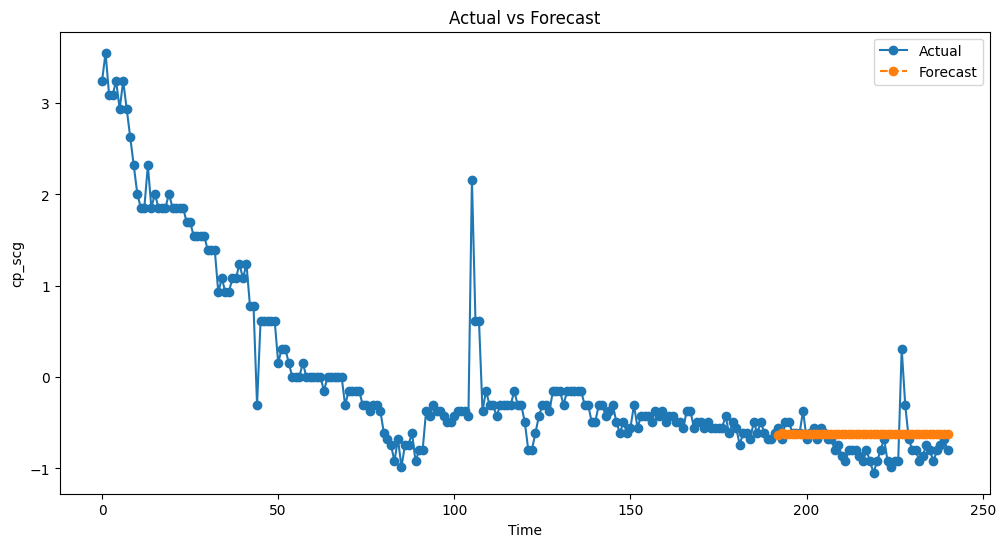

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual', marker='o', linestyle='-')
plt.plot(test.index, arima_pedict, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_scg')
plt.xticks(rotation=0)
plt.legend()
plt.show()


###GARCH

In [ ]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

In [ ]:
import arch
import pandas as pd
import numpy as np

# แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
train_size = int(len(b) * 0.8)
train_data = b.iloc[:train_size]
test_data = b.iloc[train_size:]

# สร้างและฟิตโมเดล GARCH(3,3) ด้วยข้อมูลการฝึกอบรม
garch_order = (3, 3)
model_garch = arch.arch_model(train_data['cp_scg'], x=train_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_scg']],
                             vol='Garch', p=garch_order[0], q=garch_order[1])
results_garch = model_garch.fit()

# ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
predictions = results_garch.forecast(start=0, horizon=len(test_data))
forecasted_residuals = predictions.mean.values

# แสดงชุดการทดสอบที่มีการพยากรณ์
# คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
test_data['forecasted_cp_scg'] = test_data['cp_scg'].iloc[-1] + np.cumsum(forecasted_residuals)

# แสดงชุดการทดสอบที่มีการพยากรณ์
test_data = pd.DataFrame(test_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_scg', 'cp_scg', 'forecasted_cp_scg']])
test_data.head()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 40374303395.306404
Iteration:      2,   Func. Count:     23,   Neg. LLF: 96943731.4820542
Iteration:      3,   Func. Count:     33,   Neg. LLF: 564.1209325969483
Iteration:      4,   Func. Count:     43,   Neg. LLF: 267.6444303949948
Iteration:      5,   Func. Count:     54,   Neg. LLF: 229.0283955577552
Iteration:      6,   Func. Count:     64,   Neg. LLF: 156.89510880874894
Iteration:      7,   Func. Count:     73,   Neg. LLF: 157.32886408018493
Iteration:      8,   Func. Count:     83,   Neg. LLF: 153.16126452351722
Iteration:      9,   Func. Count:     92,   Neg. LLF: 152.1730261006151
Iteration:     10,   Func. Count:    101,   Neg. LLF: 151.76448233869291
Iteration:     11,   Func. Count:    110,   Neg. LLF: 151.21440493808268
Iteration:     12,   Func. Count:    119,   Neg. LLF: 150.63145214716
Iteration:     13,   Func. Count:    128,   Neg. LLF: 150.4089098355954
Iteration:     14,   Func. Count:    137,   Neg. LLF: 150.253

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
<ipython-input-109-556dfd713dc4>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecasted_cp_scg'] = test_data['cp_scg'].iloc[-1] + np.cumsum(forecasted_residuals)


,cp_wti,cp_ex,cp_xau,vol_scg,cp_scg,forecasted_cp_scg
192,-0.140163,1.895675,-0.596981,-0.282898,-0.553296,-1.008464
193,-0.130115,1.778764,-0.086023,-0.271856,-0.676734,-1.216755
194,-0.163772,1.797223,-0.155460,-0.232316,-0.491577,-1.425047
195,0.101814,1.698772,-0.033934,-0.276843,-0.491577,-1.633338
196,0.134828,1.692619,-0.082541,-0.256538,-0.615015,-1.841629


In [ ]:
# from sklearn.metrics import mean_squared_error

# # คำนวณค่า MSE
# mse = mean_squared_error(test_data['cp_ptt_diff'], test_data['forecasted_cp_ptt_diff'], squared=True)
# print(f'Mean Squared Error (MSE): {mse}')

In [ ]:
# คำนวณค่า RMSE
mse = mean_squared_error(test_data['cp_scg'], test_data['forecasted_cp_scg'], squared=True)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# คำนวณค่า MAPE
mape = np.mean(np.abs((test_data['cp_scg'] - test_data['forecasted_cp_scg']) / test_data['cp_scg'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 6.023777981987995
Mean Absolute Percentage Error (MAPE): 744.485182811147%


###กราฟ ARIMA(3,1,3) - GARCH(3,3)

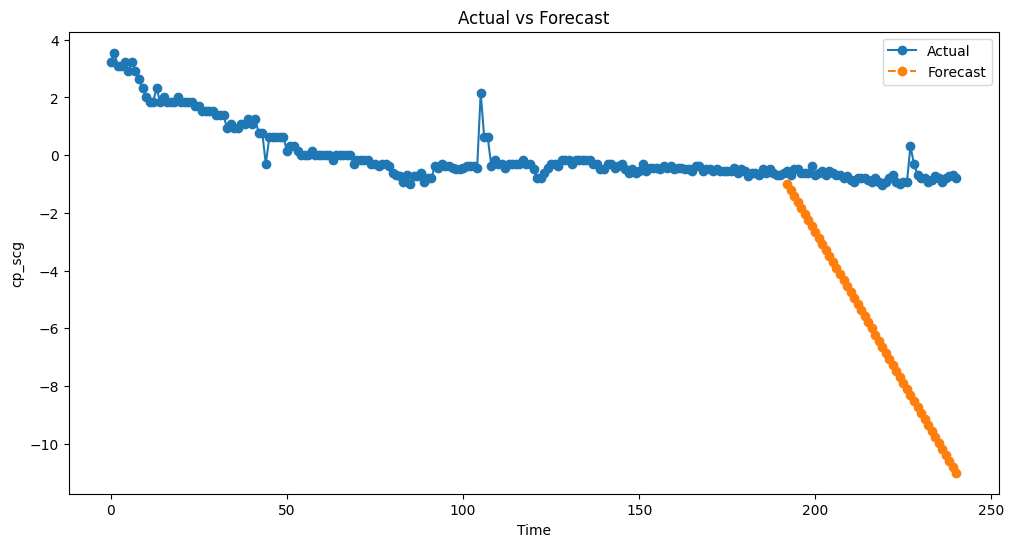

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(b['cp_scg'], label='Actual', marker='o', linestyle='-')
plt.plot(test_data.index, test_data['forecasted_cp_scg'], label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_scg')
plt.xticks(rotation=0)
plt.legend()
plt.show()

##Close Price SOLAR

###ARIMA

####ทดสอบ ADF

In [ ]:
c = scaled_df[['cp_solar','cp_wti','cp_ex','cp_xau','vol_solar']]
c

,cp_solar,cp_wti,cp_ex,cp_xau,vol_solar
0,3.496903,-1.797703,-1.100940,-1.703451,-0.157981
1,3.496903,-1.797676,-1.137859,-1.881685,-0.265913
2,2.876057,-1.547293,-0.916344,-1.912759,-0.139845
3,1.102213,-1.583688,-0.873271,-1.680860,1.707604
4,1.102213,-1.613344,-0.873271,-1.555289,0.110743
...,...,...,...,...,...
236,-2.179400,-1.217412,-0.214877,-0.394920,-0.336467
237,-2.002015,-1.335439,-0.270256,-0.134575,-0.327620
238,-2.090708,-1.398189,-0.159498,-0.144739,-0.353457
239,-2.090708,-1.428197,-0.257950,-0.089656,-0.336688


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# ทำ ADF Test
adf_result = adfuller(c['cp_solar'])

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#ค่า ADF Statistic มากกว่า Critical Values = ไม่นิ่ง

ADF Statistic: -1.3833014891100832
p-value: 0.5902548988133353
Critical Values: {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}


In [ ]:
# ลบค่าก่อนหน้าเพื่อทำให้ข้อมูล stationary
#ใชการแปลงอนุกรมเวลาให้มีค่าเฉลี่ยคงที่โดยหาผลต่างครั้งที่ d=1
c['cp_solar_diff'] = c['cp_solar'].diff()
c.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย

# ทำ ADF Test อีกครั้ง
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(c['cp_solar_diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])
#เนื่องจากค่า ADF Statistic น้อยกว่า Critical Values แสดงว่าข้อมูลนิ่งแล้ว

ADF Statistic: -9.762050230515959
p-value: 7.517793104428074e-17
Critical Values: {'1%': -3.4584868856997004, '5%': -2.873918902362675, '10%': -2.573367247623359}


<ipython-input-115-384a42ad5d5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['cp_solar_diff'] = c['cp_solar'].diff()
<ipython-input-115-384a42ad5d5a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย


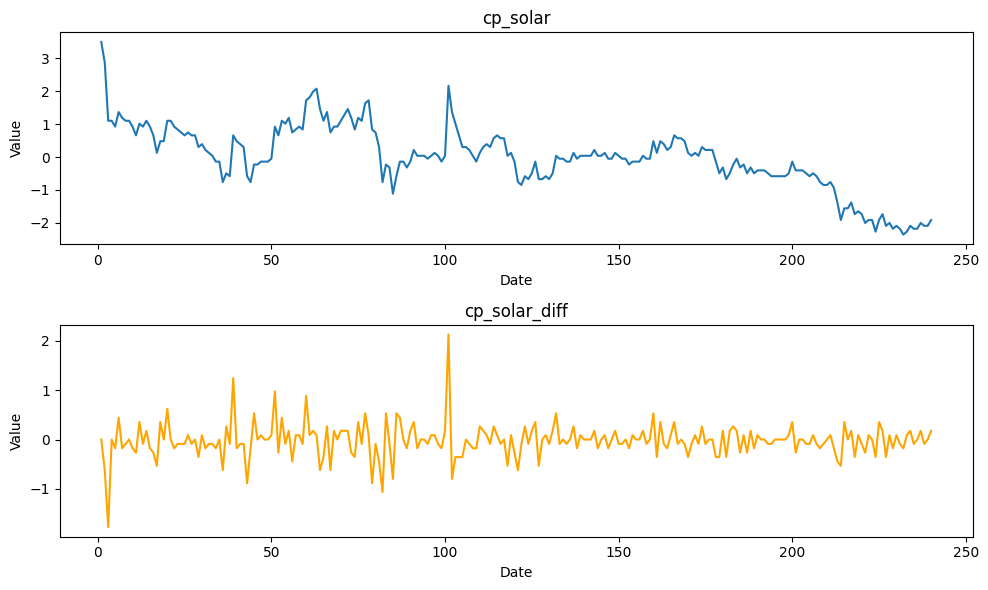

In [ ]:
import matplotlib.pyplot as plt

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_scg' ใน subplot แรก
axes[0].plot(c.index, c['cp_solar'], label='cp_solar')
axes[0].set_title('cp_solar')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')

# วาดกราฟของ 'cp_scg_diff' ใน subplot ที่สอง
axes[1].plot(c.index, c['cp_solar_diff'], label='cp_solar_diff', color='orange')
axes[1].set_title('cp_solar_diff')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')

# ปรับแต่งรูปร่างและตำแหน่งของ subplot
plt.tight_layout()

# แสดง subplot
plt.show()

####ACF และ PACF

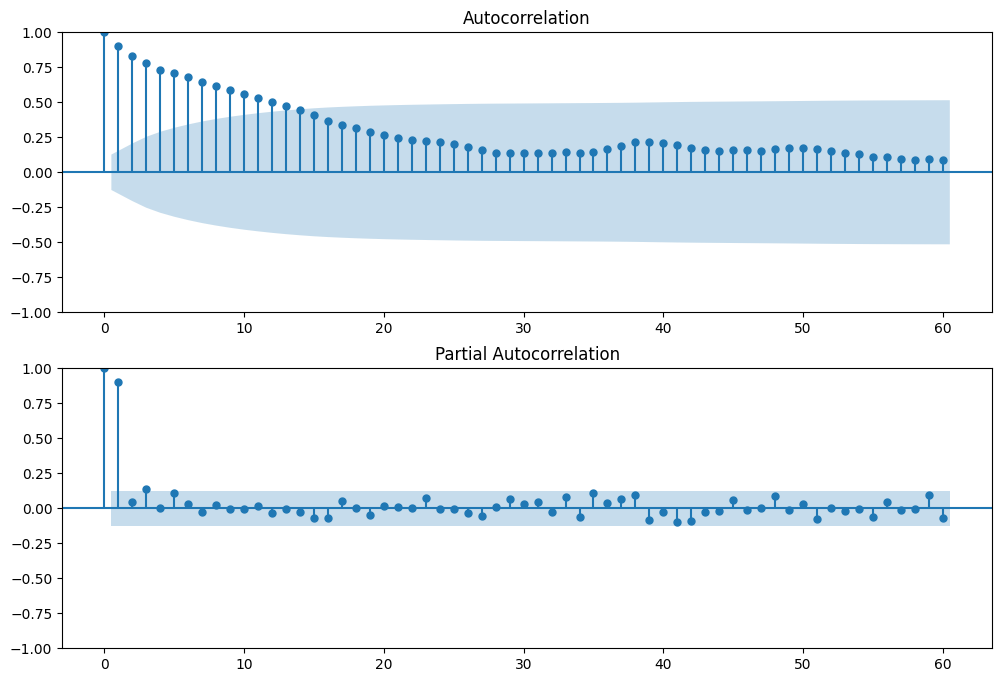

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ทำนายรายละเอียดของพารามิเตอร์ p และ q จาก ACF และ PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(c['cp_solar'], lags=60, ax=ax1)
sm.graphics.tsa.plot_pacf(c['cp_solar'], lags=60, ax=ax2)
plt.show()

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm

data = c['cp_solar_diff']

# สร้างเซตของค่า p, d, และ q
p_values = range(1, 3)  # เลือกค่า p จาก 1 ถึง 2
d_values = [1]  # ค่า d ต้องเป็น 1 สำหรับ ARIMA
q_values = range(1, 14)  # เลือกค่า q จาก 1 ถึง 13

# สร้างรายการค่า AIC และพารามิเตอร์ที่เกี่ยวข้อง
aic_values = []
params = []

# วนลูปผสานค่า p, d, และ q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # สร้างแบบจำลอง ARIMA
        model = sm.tsa.ARIMA(data, order=(p, d, q))

        # ปรับโมเดล
        results = model.fit()

        # นับค่า AIC และเก็บค่า AIC และพารามิเตอร์
        aic = results.aic
        aic_values.append(aic)
        params.append((p, d, q))

        print(f'ARIMA({p},{d},{q}) - AIC: {aic}')

    except Exception as e:
        continue

# หาค่า AIC ที่ดีที่สุดและพารามิเตอร์ที่เกี่ยวข้อง
best_aic = min(aic_values)
best_params = params[aic_values.index(best_aic)]

print(f'Best AIC: {best_aic}')
print(f'Best Model (p, d, q): {best_params}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,1) - AIC: 171.20428390649644


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,2) - AIC: 174.3786473601145


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,3) - AIC: 173.6362201593002


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

ARIMA(1,1,4) - AIC: 176.37042235666988


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,5) - AIC: 178.30228218882053


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(1,1,6) - AIC: 169.53913860087135


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(1,1,7) - AIC: 168.76945356144637


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,8) - AIC: 169.32010118279703


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,9) - AIC: 170.78985116397308


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,10) - AIC: 172.72030243468285


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(1,1,11) - AIC: 173.25403152260776


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(1,1,12) - AIC: 174.80220861139247


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1,1,13) - AIC: 175.61573876185216
ARIMA(2,1,1) - AIC: 172.79254270180732


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,2) - AIC: 173.74965823568712


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

ARIMA(2,1,3) - AIC: 167.91156523545257


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(2,1,4) - AIC: 169.4365423679992


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting paramet

ARIMA(2,1,5) - AIC: 172.6908536482611


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,6) - AIC: 164.56395972705215


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,7) - AIC: 166.74090050302618


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,8) - AIC: 167.1715521690451


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,9) - AIC: 169.37994365132752


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,10) - AIC: 171.28089230408926


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,11) - AIC: 170.1200327701186


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(2,1,12) - AIC: 170.14704181831783
ARIMA(2,1,13) - AIC: 170.81235912622282
Best AIC: 164.56395972705215
Best Model (p, d, q): (2, 1, 6)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


####ประเมินประสิทธิภาพ

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# แบ่งข้อมูลเป็นชุดการฝึกสอนและชุดทดสอบ
data = c['cp_solar_diff']
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# สร้างโมเดล ARIMA(2,1,6)
order = (2, 1, 6)
model = ARIMA(train, order=order)
model_fit = model.fit()

# ทำนายค่า cp_ptt ในชุดทดสอบ
arima_pedict= model_fit.forecast(steps=len(test))

# คำนวณค่า RMSE และ MAPE
mse = mean_squared_error(test, arima_pedict)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

n = len(test)
mape = (1/n) * np.sum(np.abs((test - arima_pedict) / test)) *100

print("Mean Absolute Percentage Error (MAPE):", mape)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Root Mean Squared Error (RMSE): 0.19581826911278588
Mean Absolute Percentage Error (MAPE): inf


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


####กราฟ ARIMA(2,1,6)

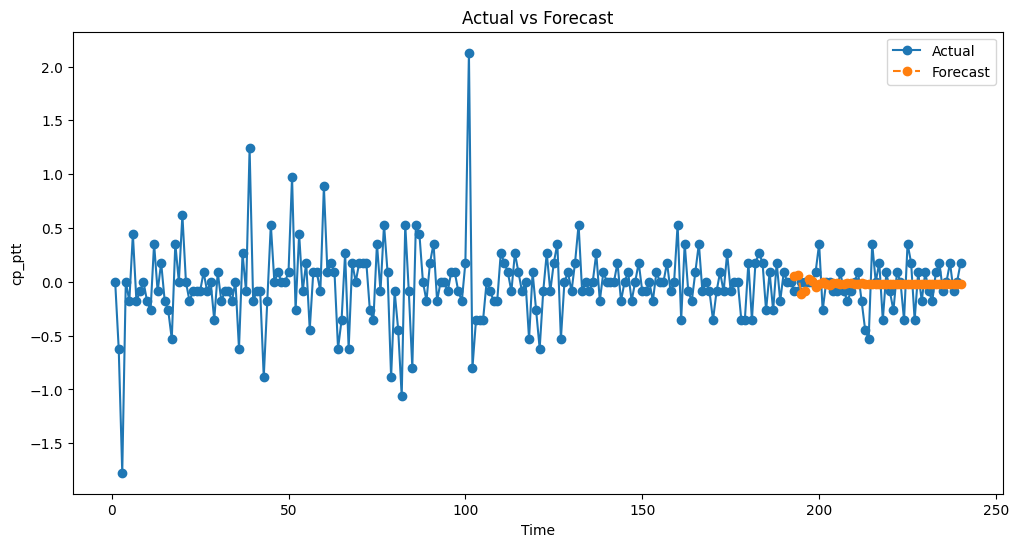

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual', marker='o', linestyle='-')
plt.plot(test.index, arima_pedict, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()


###GARCH

In [ ]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

In [ ]:
import arch
import pandas as pd
import numpy as np

# แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
train_size = int(len(a) * 0.8)
train_data = c.iloc[:train_size]
test_data = c.iloc[train_size:]

# สร้างและฟิตโมเดล GARCH(2,6) ด้วยข้อมูลการฝึกอบรม
garch_order = (2, 6)
model_garch = arch.arch_model(train_data['cp_solar_diff'], x=train_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_solar']],
                             vol='Garch', p=garch_order[0], q=garch_order[1])
results_garch = model_garch.fit()

# ใช้โมเดล GARCH ที่ฟิตแล้วเพื่อทำนายค่าความผิดพลาดสำหรับชุดทดสอบ
predictions = results_garch.forecast(start=0, horizon=len(test_data))
forecasted_residuals = predictions.mean.values

# แสดงชุดการทดสอบที่มีการพยากรณ์
# คำนวณค่า 'cp_ptt_diff' สำหรับชุดทดสอบ
forecasted_residuals = np.resize(forecasted_residuals, len(test_data))  # ปรับขนาดค่าความผิดพลาดให้มีความยาวเท่ากับชุดทดสอบ
test_data['forecasted_cp_solar_diff'] = test_data['cp_solar_diff'].iloc[-1] + np.cumsum(forecasted_residuals)

# แสดงชุดการทดสอบที่มีการพยากรณ์
test_data = pd.DataFrame(test_data[['cp_wti', 'cp_ex', 'cp_xau', 'vol_solar', 'cp_solar_diff', 'forecasted_cp_solar_diff']])
test_data.head()

Iteration:      1,   Func. Count:     12,   Neg. LLF: 26642052208.96117
Iteration:      2,   Func. Count:     26,   Neg. LLF: 114871932.85239612
Iteration:      3,   Func. Count:     39,   Neg. LLF: 83.00513457858402
Iteration:      4,   Func. Count:     51,   Neg. LLF: 73.95136225874853
Iteration:      5,   Func. Count:     62,   Neg. LLF: 73.36569141590134
Iteration:      6,   Func. Count:     74,   Neg. LLF: 91.4724048567092
Iteration:      7,   Func. Count:     90,   Neg. LLF: 67.86342948920183
Iteration:      8,   Func. Count:    101,   Neg. LLF: 68.76294699258435
Iteration:      9,   Func. Count:    113,   Neg. LLF: 67.12865929952446
Iteration:     10,   Func. Count:    124,   Neg. LLF: 67.06849838582227
Iteration:     11,   Func. Count:    135,   Neg. LLF: 67.04405288592025
Iteration:     12,   Func. Count:    146,   Neg. LLF: 67.04361093340698
Iteration:     13,   Func. Count:    157,   Neg. LLF: 67.04276285190421
Iteration:     14,   Func. Count:    168,   Neg. LLF: 102267730.

/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(
<ipython-input-122-f7cfd9c7c335>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['forecasted_cp_solar_diff'] = test_data['cp_solar_diff'].iloc[-1] + np.cumsum(forecasted_residuals)


,cp_wti,cp_ex,cp_xau,vol_solar,cp_solar_diff,forecasted_cp_solar_diff
193,-0.130115,1.778764,-0.086023,-0.312138,-0.088692,0.165006
194,-0.163772,1.797223,-0.155460,-0.305060,-0.088692,0.152628
195,0.101814,1.698772,-0.033934,-0.304618,0.000000,0.140249
196,0.134828,1.692619,-0.082541,-0.333592,0.000000,0.127871
197,0.138399,1.760304,-0.483053,-0.315898,0.000000,0.115493


In [ ]:
# คำนวณค่า RMSE
mse = mean_squared_error(test_data['cp_solar_diff'], test_data['forecasted_cp_solar_diff'], squared=True)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# คำนวณค่า MAPE
mape = np.mean(np.abs((test_data['cp_solar_diff'] - test_data['forecasted_cp_solar_diff']) / test_data['cp_solar_diff'])) * 100
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Root Mean Squared Error (RMSE): 0.2824728635143932
Mean Absolute Percentage Error (MAPE): inf%


###กราฟ ARIMA(2,1,6) - GARCH(2,6)

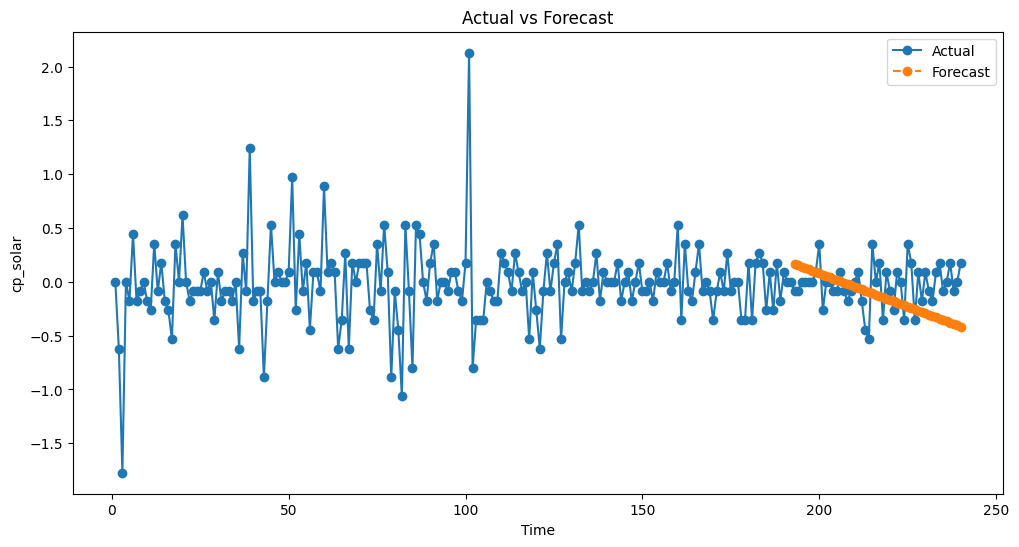

In [ ]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(c['cp_solar_diff'], label='Actual', marker='o', linestyle='-')
plt.plot(test_data.index, test_data['forecasted_cp_solar_diff'], label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_solar')
plt.xticks(rotation=0)
plt.legend()
plt.show()